In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:


df = pd.read_csv("/content/stock_market_data-AAL (1).csv")
# Display the DataFrame
print(df.head())


         Date    Low   High  Close   Open
0  27-09-2005  19.10  21.40  19.30  21.05
1  28-09-2005  19.20  20.53  20.50  19.30
2  29-09-2005  20.10  20.58  20.21  20.40
3  30-09-2005  20.18  21.05  21.01  20.26
4  03-10-2005  20.90  21.75  21.50  20.90


In [ ]:
features = ['Open', 'High', 'Low']
target = 'Close'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[features]
y=df[target]
dates = df['Date']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=False
)

In [ ]:
x_train.head()

,Open,High,Low
0,21.05,21.40,19.10
1,19.30,20.53,19.20
2,20.40,20.58,20.10
3,20.26,21.05,20.18
4,20.90,21.75,20.90


In [ ]:
print(x_train.shape,x_test.shape)

(3886, 3) (972, 3)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid (values of k to test)
param_grid = {'n_neighbors': range(1, 21)}  # Test k values from 1 to 20

# Set up grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best value of k
print("Best value of k:", grid_search.best_params_['n_neighbors'])


Best value of k: 7


In [ ]:
k = 5 # number of neighbors
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
x_test

,Open,High,Low
3886,20.780,21.705,20.650
3887,21.585,21.810,20.660
3888,21.670,22.480,21.370
3889,22.000,22.500,21.765
3890,22.180,23.540,22.130
...,...,...,...
4853,17.930,18.450,17.800
4854,17.915,17.980,17.320
4855,17.790,18.240,17.790
4856,18.540,18.560,17.970


In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
#evaluate model's performance on train data
predict = regressor.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = np.sqrt(mean_squared_error(y_train, predict))
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9996699331690636
Mean Squared Error: 0.09028440188193516
Root Mean Squared Error: 0.3004736292620954
Mean Absolute Error: 0.20644932063818844


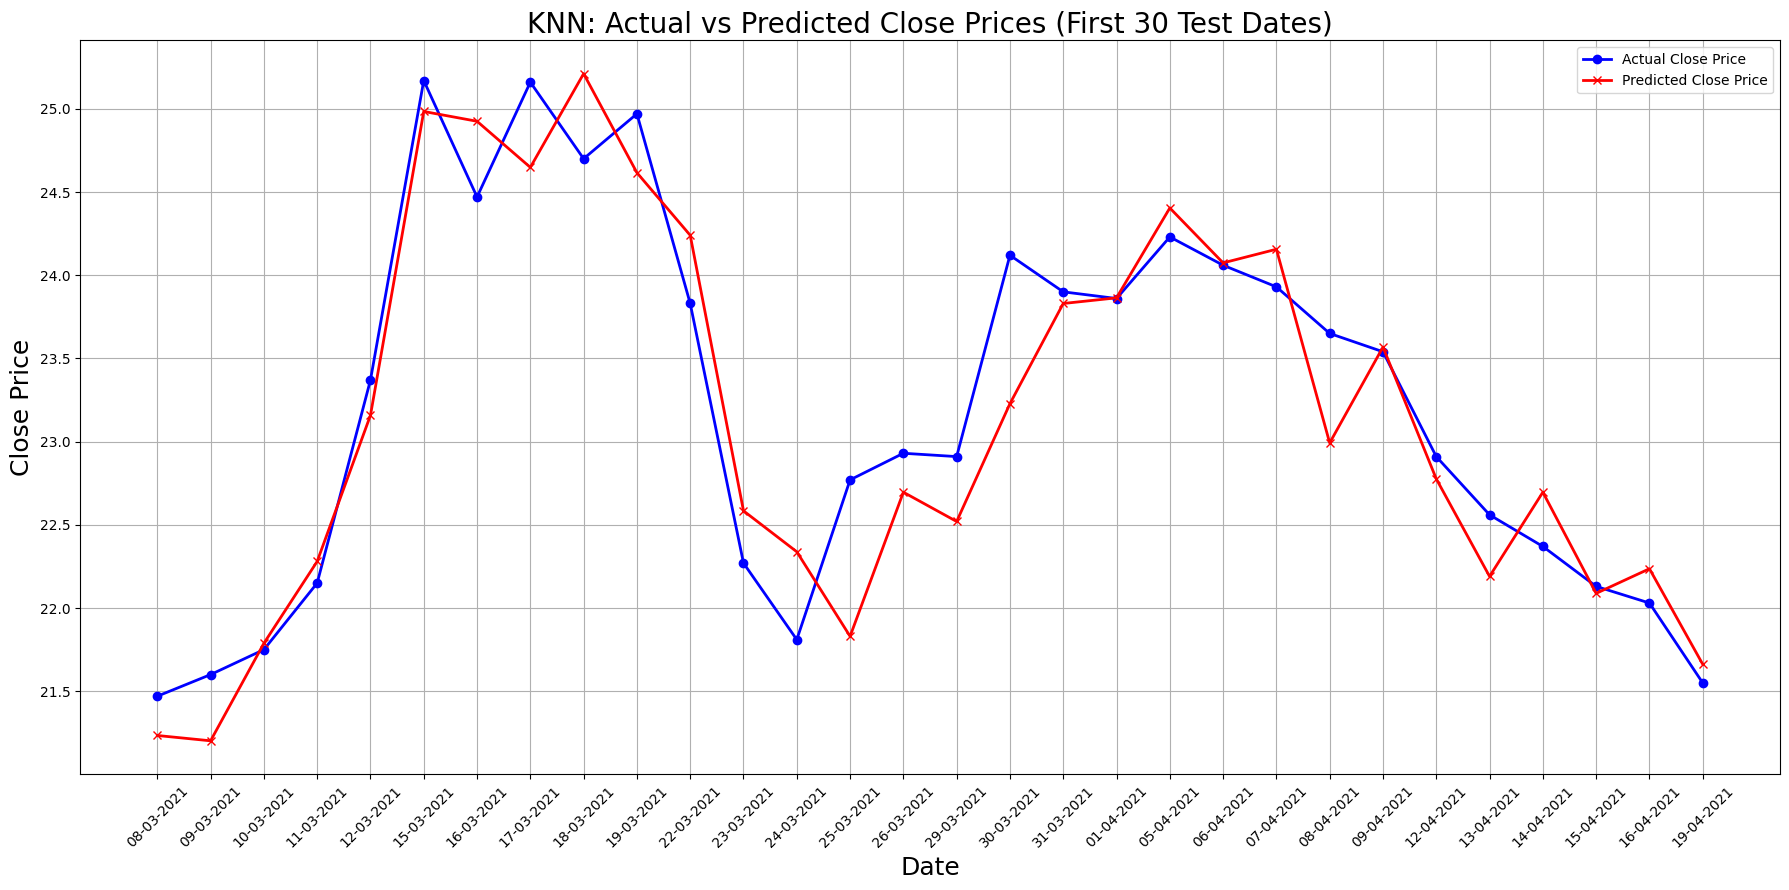

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the original dataset with a 'Date' column
# and 'x_test' is derived from 'df' after splitting
plt.figure(figsize=(18, 9))

# Get the indices of the test set to match with the dates
test_indices = x_test.index
actual_dates = df.loc[test_indices, 'Date']  # Extract dates matching test indices

# Convert the 'Date' column to datetime if not already
#actual_dates = pd.to_datetime(actual_dates)

# Plot the first 30 test dates along with actual and predicted values
actual_knn = y_test[:30].values  # Ensure it's in array form for plotting
predicted_knn = y_pred[:30]  # Predictions corresponding to the first 30 test values

# Plotting
plt.plot(actual_dates[:30], actual_knn, label="Actual Close Price", color="blue", marker='o', linewidth=2, markersize=6)
plt.plot(actual_dates[:30], predicted_knn, label="Predicted Close Price", color="red", marker='x', linewidth=2, markersize=6)

# Formatting the plot
plt.legend()
plt.title("KNN: Actual vs Predicted Close Prices (First 30 Test Dates)", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()
plt.savefig("knn_first_30_test_dates_plot.png", dpi=300)  # Optional: Save the plot in high resolution
plt.show()


In [ ]:
# Fetch the actual close price for Day 1
day1_actual_close_price = y_test.iloc[0]  # Accessing the first element of the Series

# To fetch the corresponding date, adjust based on the indexing of the DataFrame (df)
day1_date = df['Date'].iloc[-len(y_test)]  # Assuming y_test aligns with the last 'n' rows in 'df'

print(f"Date: {day1_date}, Actual Close Price of Day 1: {day1_actual_close_price}")


Date: 08-03-2021, Actual Close Price of Day 1: 21.47


In [ ]:
df

,Date,Low,High,Close,Open
0,27-09-2005,19.10,21.40,19.30,21.050
1,28-09-2005,19.20,20.53,20.50,19.300
2,29-09-2005,20.10,20.58,20.21,20.400
3,30-09-2005,20.18,21.05,21.01,20.260
4,03-10-2005,20.90,21.75,21.50,20.900
...,...,...,...,...,...
4853,10-01-2025,17.80,18.45,18.38,17.930
4854,13-01-2025,17.32,17.98,17.60,17.915
4855,14-01-2025,17.79,18.24,18.21,17.790
4856,15-01-2025,17.97,18.56,18.07,18.540


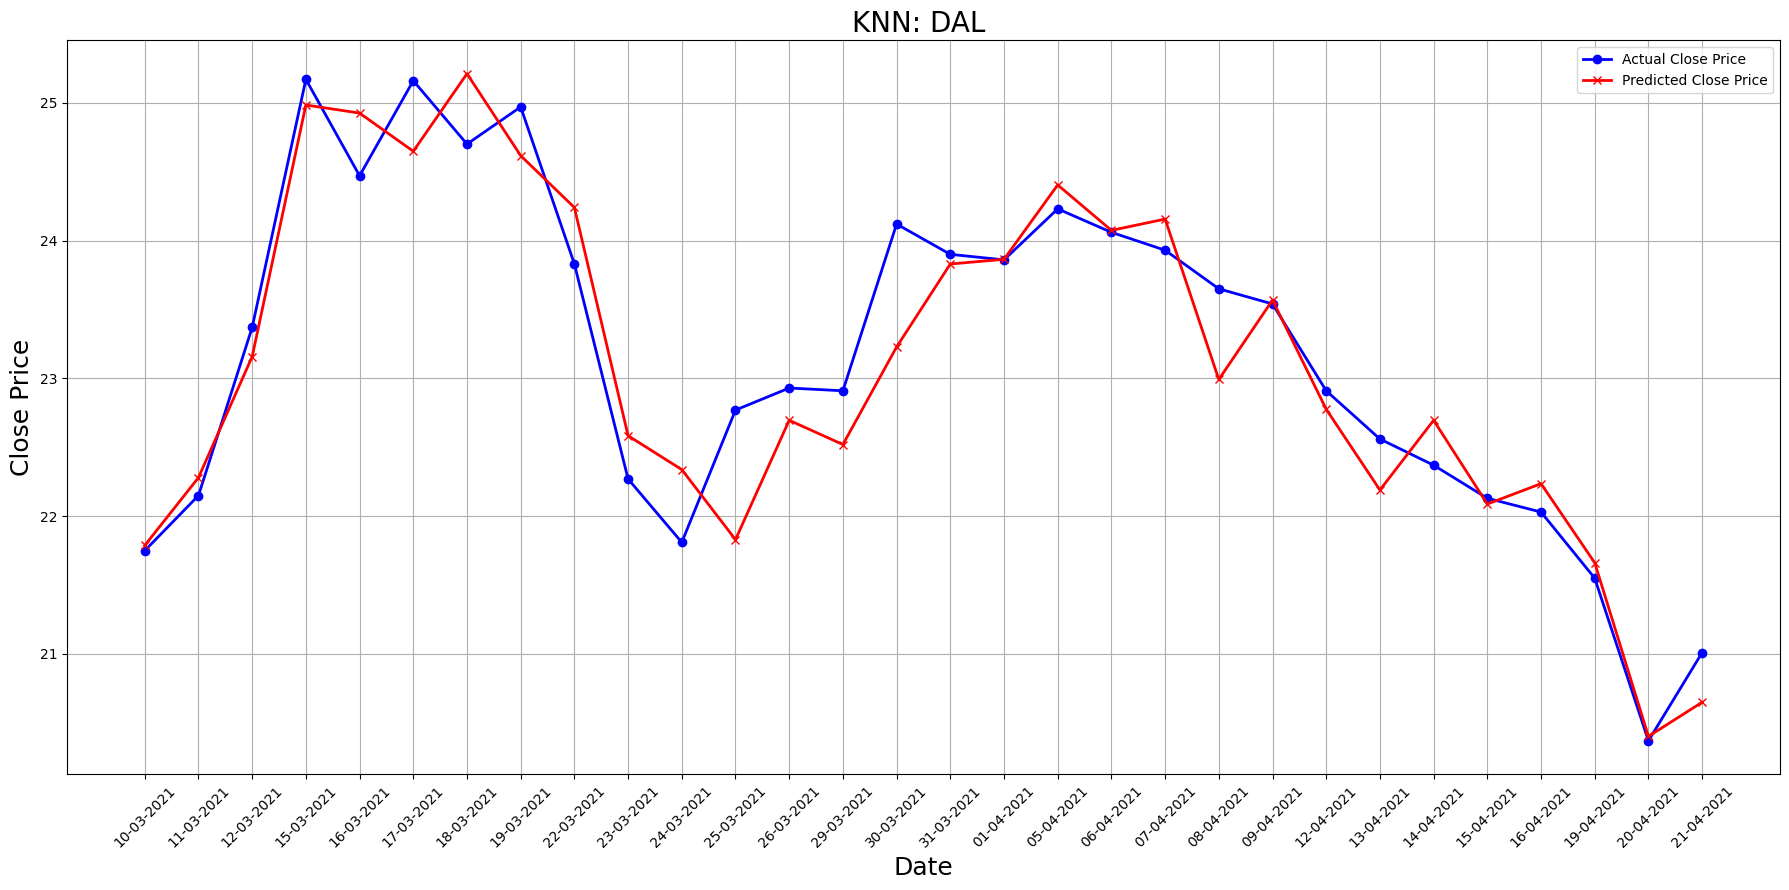

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the original dataset with a 'Date' column
# and 'x_test' is derived from 'df' after splitting
plt.figure(figsize=(18, 9))

# Get the indices of the test set to match with the dates
test_indices = x_test.index
actual_dates = df.loc[test_indices, 'Date']  # Extract dates matching test indices

# Convert the 'Date' column to datetime if not already
# actual_dates = pd.to_datetime(actual_dates)

# Adjust data to start 2 days later
actual_dates_adjusted = actual_dates[2:32]  # Shift the start by 2 days and take 30 entries
actual_knn_adjusted = y_test[2:32].values  # Adjust corresponding actual values
predicted_knn_adjusted = y_pred[2:32]  # Adjust corresponding predicted values

# Plotting
plt.plot(actual_dates_adjusted, actual_knn_adjusted, label="Actual Close Price", color="blue", marker='o', linewidth=2, markersize=6)
plt.plot(actual_dates_adjusted, predicted_knn_adjusted, label="Predicted Close Price", color="red", marker='x', linewidth=2, markersize=6)

# Formatting the plot
plt.legend()
plt.title("KNN: DAL ", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()
plt.savefig("knn_aal.png", dpi=300)  # Optional: Save the plot in high resolution
plt.show()
